In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [53]:
# Set random seed for reproducibility
np.random.seed(42)

# total customers 500
num_customers = 500

# Customer IDs
customer_ids = np.arange(1001, 1001 + num_customers)

# Ages between 18 and 65
ages = np.random.randint(18, 65, size=num_customers)

# Gender
genders = np.random.choice(['Male', 'Female'], size=num_customers)

# Marital status
marital_statuses = np.random.choice(['Married', 'Single', 'Divorced'], size=num_customers)

#  Annual income
annual_incomes = np.random.randint(40000, 120001, size=num_customers)

#  Total purchases between 5 and 25
total_purchases = np.random.randint(5, 25, size=num_customers)

# Preferred categories
preferred_categories = np.random.choice(['Electronics', 'Appliances', 'Clothing'], size=num_customers)

# Create a DataFrame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'MaritalStatus': marital_statuses,
    'AnnualIncome': annual_incomes,
    'TotalPurchases': total_purchases,
    'PreferredCategory': preferred_categories
})
# Save the generated data to a CSV file
data.to_csv('TechElectro_Customer_Data.csv', index=False)

In [54]:
data.head(10)

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome,TotalPurchases,PreferredCategory
0,1001,56,Male,Married,96133,24,Electronics
1,1002,46,Male,Single,101268,9,Clothing
2,1003,32,Male,Divorced,78243,8,Electronics
3,1004,60,Male,Single,97384,16,Electronics
4,1005,25,Male,Divorced,71653,24,Clothing
5,1006,38,Female,Divorced,66657,22,Electronics
6,1007,56,Male,Married,79952,21,Appliances
7,1008,36,Male,Married,62180,23,Clothing
8,1009,40,Male,Single,118411,13,Appliances
9,1010,28,Female,Married,41622,8,Clothing


In [55]:
data.isna().sum()

CustomerID           0
Age                  0
Gender               0
MaritalStatus        0
AnnualIncome         0
TotalPurchases       0
PreferredCategory    0
dtype: int64

In [56]:
# No missing values

<Axes: >

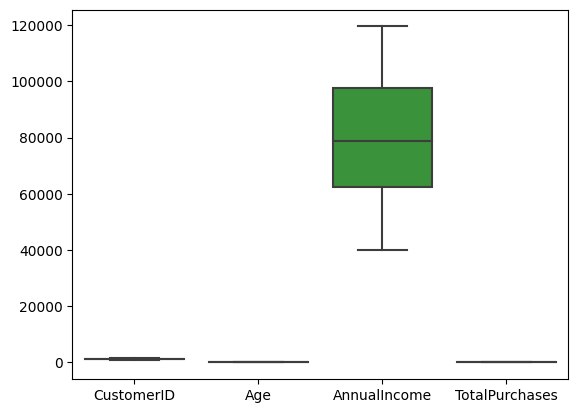

In [57]:
sns.boxplot(data)

In [58]:
# No outliers

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         500 non-null    int64 
 1   Age                500 non-null    int64 
 2   Gender             500 non-null    object
 3   MaritalStatus      500 non-null    object
 4   AnnualIncome       500 non-null    int64 
 5   TotalPurchases     500 non-null    int64 
 6   PreferredCategory  500 non-null    object
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [60]:
data.describe()

,CustomerID,Age,AnnualIncome,TotalPurchases
count,500.000000,500.000000,500.00000,500.000000
mean,1250.500000,41.278000,79899.35400,14.112000
std,144.481833,13.389072,22478.86157,5.785361
min,1001.000000,18.000000,40060.00000,5.000000
25%,1125.750000,30.000000,62368.25000,9.000000
50%,1250.500000,42.000000,78634.00000,14.000000
75%,1375.250000,52.000000,97814.25000,19.000000
max,1500.000000,64.000000,119561.00000,24.000000


In [61]:
Label_Enc = LabelEncoder()
data['Gender'] = Label_Enc.fit_transform(data['Gender'])
data['MaritalStatus'] = Label_Enc.fit_transform(data['MaritalStatus'])
data['PreferredCategory'] = Label_Enc.fit_transform(data['PreferredCategory'])

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CustomerID         500 non-null    int64
 1   Age                500 non-null    int64
 2   Gender             500 non-null    int64
 3   MaritalStatus      500 non-null    int64
 4   AnnualIncome       500 non-null    int64
 5   TotalPurchases     500 non-null    int64
 6   PreferredCategory  500 non-null    int64
dtypes: int64(7)
memory usage: 27.5 KB


In [63]:
data.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome,TotalPurchases,PreferredCategory
0,1001,56,1,1,96133,24,2
1,1002,46,1,2,101268,9,1
2,1003,32,1,0,78243,8,2
3,1004,60,1,2,97384,16,2
4,1005,25,1,0,71653,24,1


In [64]:
scaler = MinMaxScaler()
numerical_columns = ['Age', 'AnnualIncome', 'TotalPurchases']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

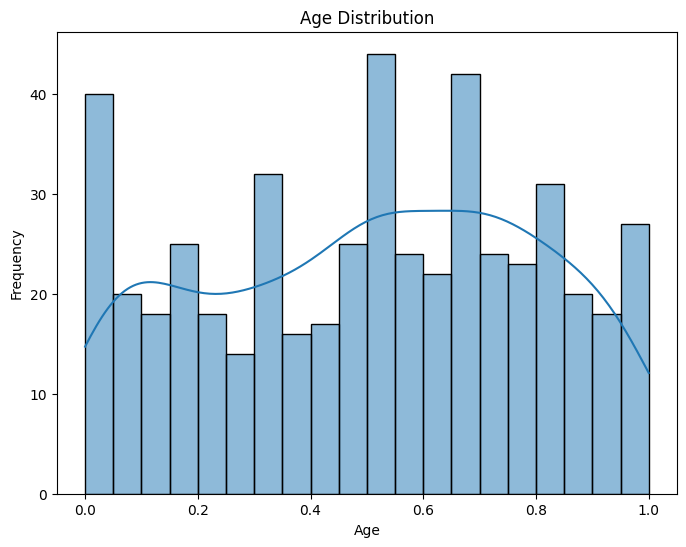

In [65]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

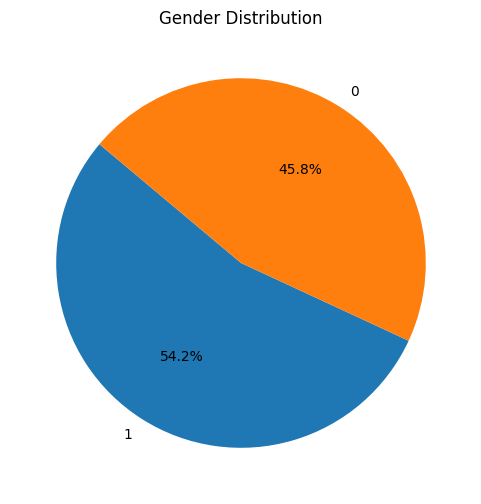

In [66]:
# Gender distribution as a pie chart
plt.figure(figsize=(6, 6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

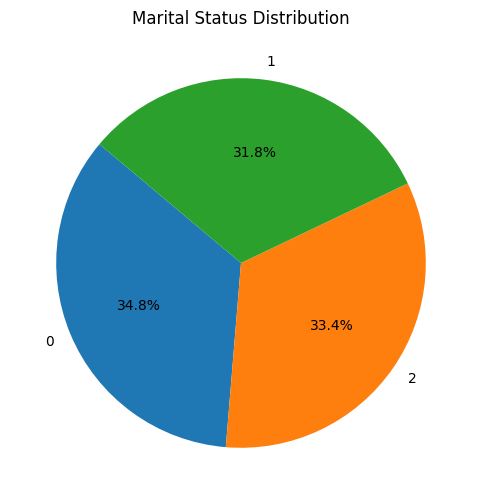

In [67]:
# Marital status distribution as a pie chart
plt.figure(figsize=(6, 6))
marital_status_counts_total = data['MaritalStatus'].value_counts()
plt.pie(marital_status_counts_total, labels=marital_status_counts_total.index, autopct='%1.1f%%', startangle=140)
plt.title('Marital Status Distribution')
plt.show()

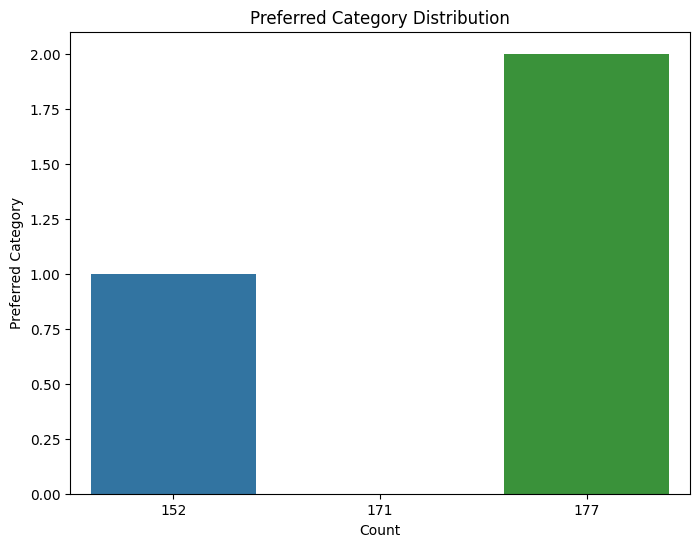

In [68]:
# Horizontal bar plot for preferred category distribution
plt.figure(figsize=(8, 6))
preferred_category_counts = data['PreferredCategory'].value_counts()
sns.barplot(x=preferred_category_counts, y=preferred_category_counts.index)
plt.title('Preferred Category Distribution')
plt.xlabel('Count')
plt.ylabel('Preferred Category')
plt.show()

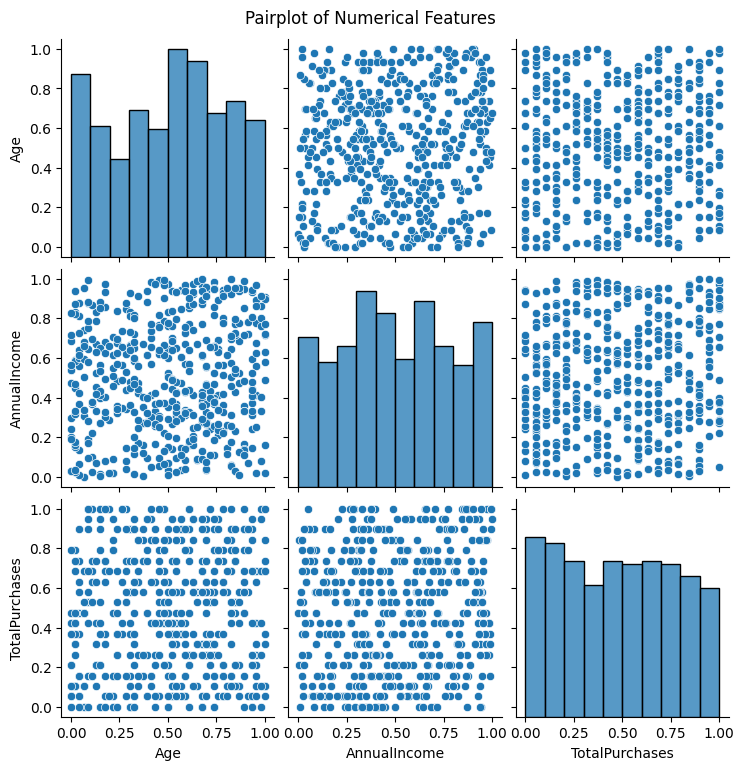

In [48]:
# Pairplot for numerical features
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


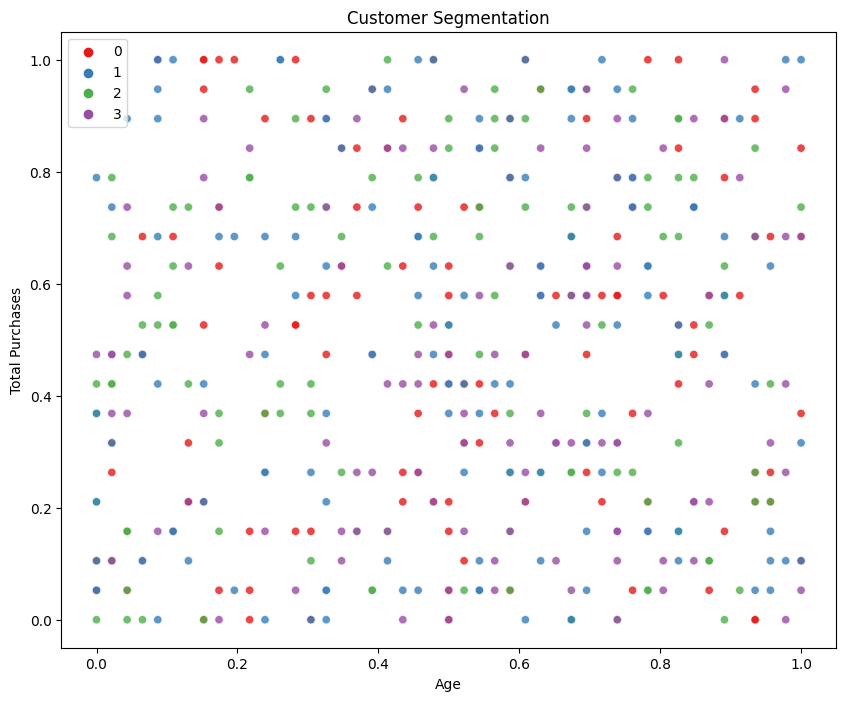

In [32]:
# Perform K-means clustering
num_clusters = 4  # Number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age', y='TotalPurchases', hue='Cluster', data=data, palette='Set1', alpha=0.8)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Total Purchases')
plt.legend()
plt.show()